# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

## GOAL :

To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset:

In [2]:
# Reading the csv file from dataset
df = pd.read_csv("loan.csv")

In [3]:
#Displaying the dataset
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


From the above dataset we can say that, our target column the loan status has categorical type data in it. Hence classification methods can be used in model training this data.

# Preprocessing and EDA:

In [4]:
# Checking the dimension of dataset
df.shape

(614, 13)

The dataset contains 614 rows and 13 columns which includes both categorical and numerical data.

In [5]:
# Checking the type of dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset contains object,integer and float type of data. Since we have object data type we can use encoding methods to convert the data into numerical form in further steps of model training.

In [6]:
# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


The above are the categorical columns in the given dataset.

In [7]:
# Checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


The above are numerical columns present in the dataset. The columns 'Loan_Amount_Term','Credit_History' have categories in integer data type so they also comes under categorical type.

In [8]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are some null values in some of the columns.

In [9]:
# Checking number of unique values in each column
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

The above are the count of number of unique values present in each of the columns.

In [10]:
# Checking the values counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('_'*50)

LP002116    1
LP002065    1
LP002151    1
LP001138    1
LP002778    1
           ..
LP001964    1
LP002265    1
LP002837    1
LP002717    1
LP001656    1
Name: Loan_ID, Length: 614, dtype: int64
__________________________________________________
Male      489
Female    112
Name: Gender, dtype: int64
__________________________________________________
Yes    398
No     213
Name: Married, dtype: int64
__________________________________________________
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
__________________________________________________
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
__________________________________________________
No     500
Yes     82
Name: Self_Employed, dtype: int64
__________________________________________________
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64
______________________________________

The above is the list of value count of each of the columns. 

The column Loan_ID is the application number for loan, which has no significance in the prediction. Hence it can be dropped.

In [11]:
# Dropping Loan_ID column from the dataset
df.drop("Loan_ID",axis=1,inplace=True)

In [12]:
# Checking null values in the dataset
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

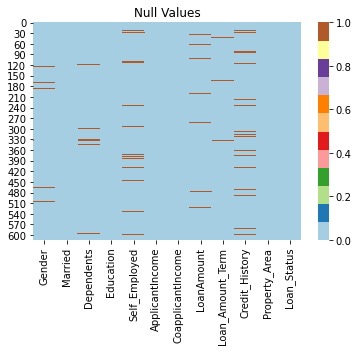

In [13]:
# Visualizing null values using a heatmap
sns.heatmap(df.isnull(),cmap="Paired")
plt.title("Null Values")
plt.show()

From the above output we can see there are missing values in the following columns: 
- Gender
- Married
- Dependents
- Self_Employed
- LoanAmount
- Loan_Amount_Term
- Credit_History

We have to replace these null values using imputation techniques.

# Imputation technique to replace NaN values:

In [14]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

There is skewness in all the numerical column so we cannot replace the NaN values with 'mean', we have to replace it with 'median'.

In [15]:
#Replacing NaN values in numerical columns
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [16]:
# Replacing null values in categorical columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [17]:
# Checking for the NaN values again
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

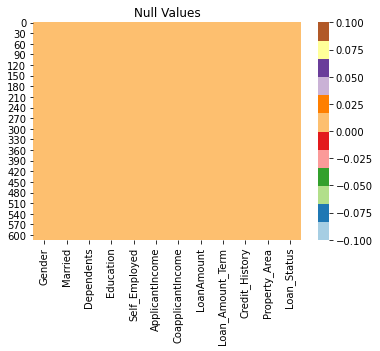

In [18]:
# Let's check again visualize the null values clearly
sns.heatmap(df.isnull(),cmap="Paired")
plt.title("Null Values")
plt.show()

We can see that there are no missing values in the dataset.

In [19]:
# Checking uniqueness of primary_fuel
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

These are the unique values are present in the target column.

We have two counts in Loan_Status namely "Y" and "N". 

Here "Y" stands for "Yes" that is the loan of the applicant is approved and "N" stands for "No" that is the loan of the applicant is not approved.

In [20]:
# Checking the list of counts in target columns
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

This shows that there is an imbalnce in the target column. This shall be treated in the further steps.

In [21]:
# Checking the dataset id there are any blank columns left
df.loc[df['Loan_Status']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


We can see that there are no blank spaces in the dataset.

In [22]:
# Checking description of dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


The description gives us statistical summary of the dataset. Those columns with the numerical form of data are only displayed here. It doesnot show the summary of the categorical columns.

# Observations

- The count of all the columns is same. Which says there are no null values.
- There are no negative values or invalid values .
- The mean value and 2nd quantile(Median) value has high difference in almost all the columns which says there is skewness in those columns.
-  The max value and 3rd quantile value has high difference in almost all the columns which means there is a lot of outliers in all the columns.
- Columns "ApplicantIncome", "CoapplicantIncome" has high standard deviation than the mean which indicates data are more spread out.
- We can see that Minimum loan term is 12 and Minimum loan amount is 9.

In [23]:
#Checking the info about the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


The data now looks good. We can proceed with the further analysis of data

# Data Visualization:

# Univariate Analysis:

Y    422
N    192
Name: Loan_Status, dtype: int64


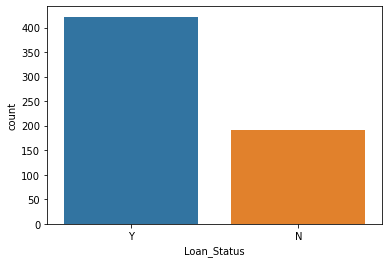

In [24]:
#Visualizing the target column loan approval status
print(df["Loan_Status"].value_counts())
sns.countplot(df["Loan_Status"])
plt.show()

# Observations
We can see that loan is approved for 422 applicants and rejected for 192 applicants.

Male      502
Female    112
Name: Gender, dtype: int64


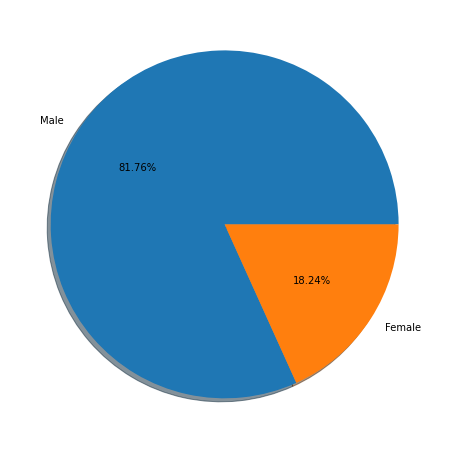

In [25]:
#Visualizing the Gender  count of applicants
print(df["Gender"].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

# Observations
This shows there are more number of Male applicants than Female applicants.  About 81% of the applicants are Male candidates whereas just 18% of them are Female candidates.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


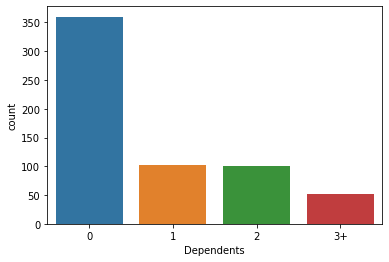

In [26]:
# Visualizing the count of Dependents 
print(df["Dependents"].value_counts())
sns.countplot(df["Dependents"])
plt.show()

# Observations
- The applicants having 0 dependents are higher than the applicants having any dependents.
- There are not many applicants those who have more than 3 dependents.

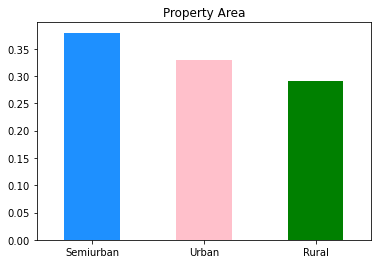

In [27]:
#Ordinal Data
plt.figure(1)

Color2 = ["dodgerblue", "pink", "green"]

df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property Area', color = Color2)
plt.xticks(rotation = 0)

plt.show()

# Observations
This shows that there are more number of properties in the Semiurban Area which is followed by Urban area and the properties in rural are least of all,

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


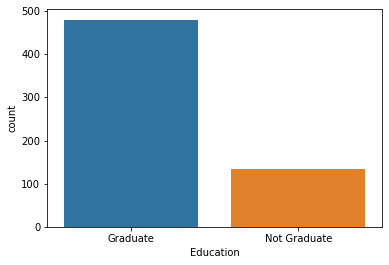

In [28]:
# Visualizing the count of Education of the applicants
print(df["Education"].value_counts())
sns.countplot(df["Education"])
plt.show()

# Observations
The count of Graduate applicants is higher than the Non - Graduate applicants

No     532
Yes     82
Name: Self_Employed, dtype: int64


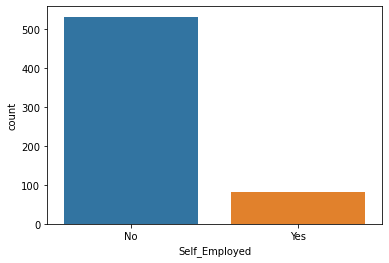

In [29]:
# Visualizing the count of Self_Employed applicants
print(df["Self_Employed"].value_counts())
sns.countplot(df["Self_Employed"])
plt.show()

# Observations
Only 82 applicants are self employed out of 614 applicants. Most of the applicants are not self employed that means they might working in the public and private sectors.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


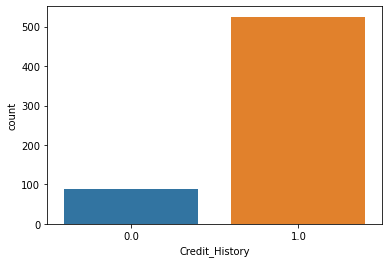

In [30]:
# Visualizing the count of Credit_History of the applicants
print(df["Credit_History"].value_counts())
sns.countplot(df["Credit_History"])
plt.show()

# Observations
Most of the applicants have credit history in the past.

# Distribution of skewness:

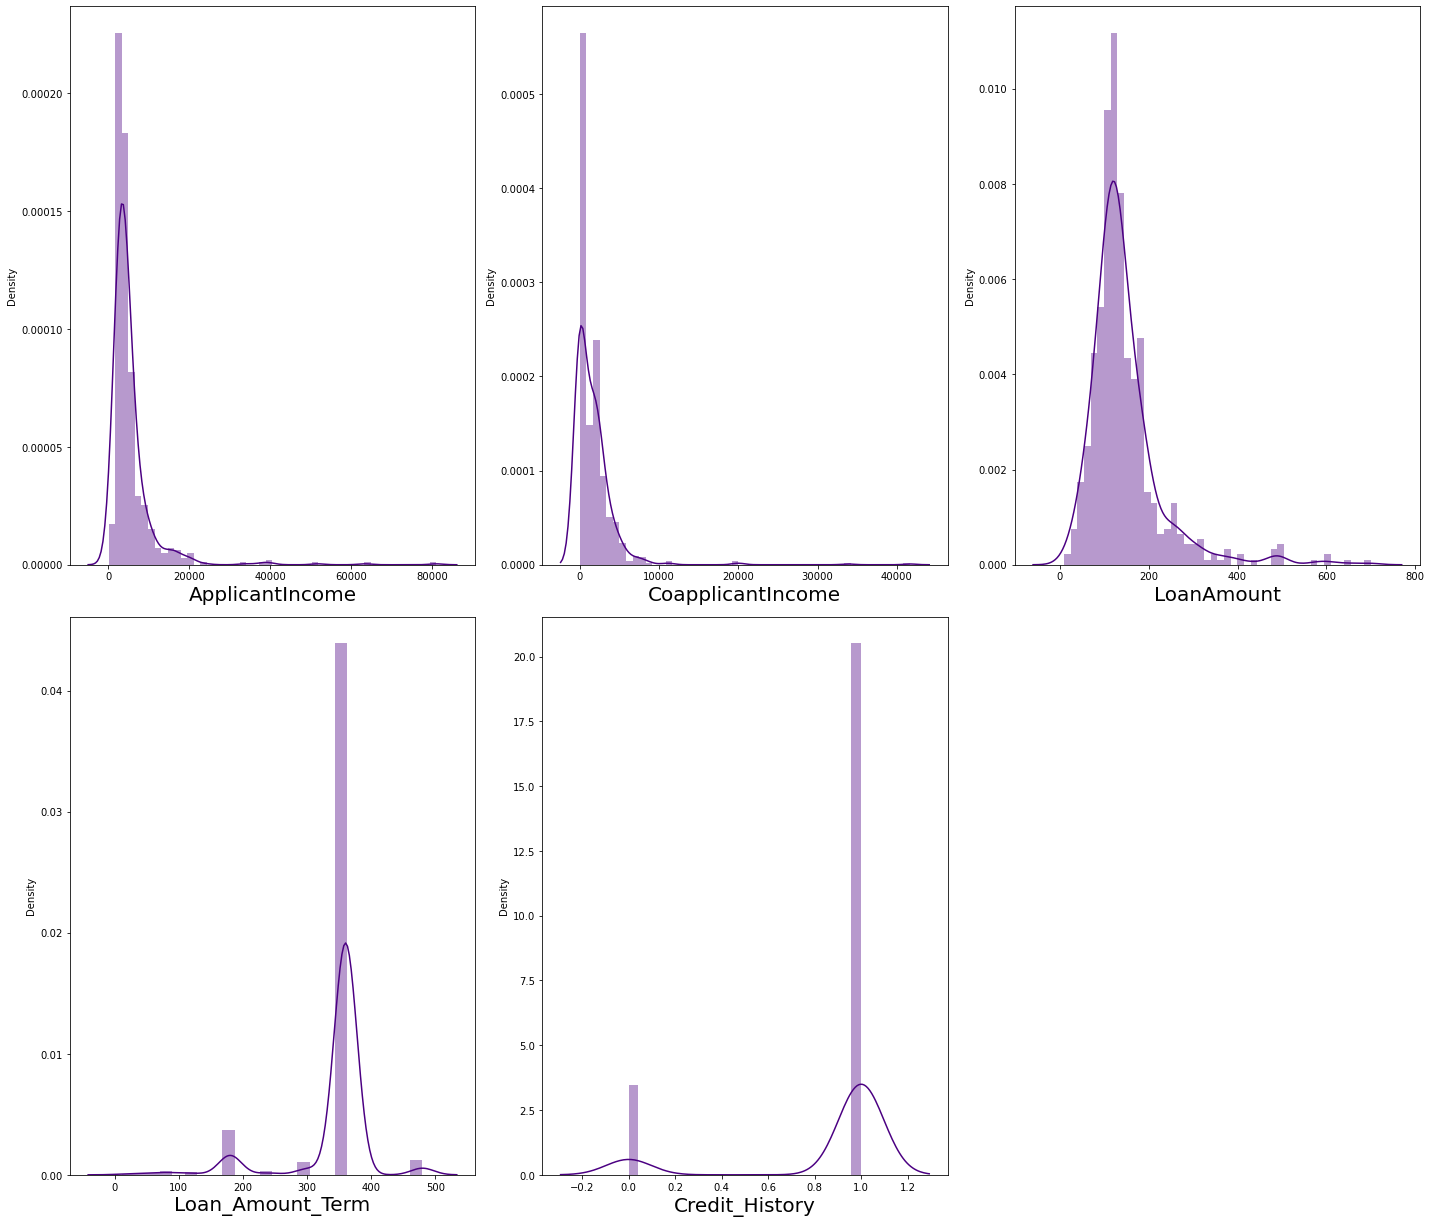

In [31]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Observations
- The data is not normally distributed in any of the columns. 
- The mean value is greater than the median in ApplicantIncome, CoapplicantIncome, LoanAmount and TotalIncome which means they are skewed to right. 
- The median is greater than the mean in Loan_Amount_Term and Credit_History columns which means they are skewed to left. Which will be removed using appropriate methods in the later part.

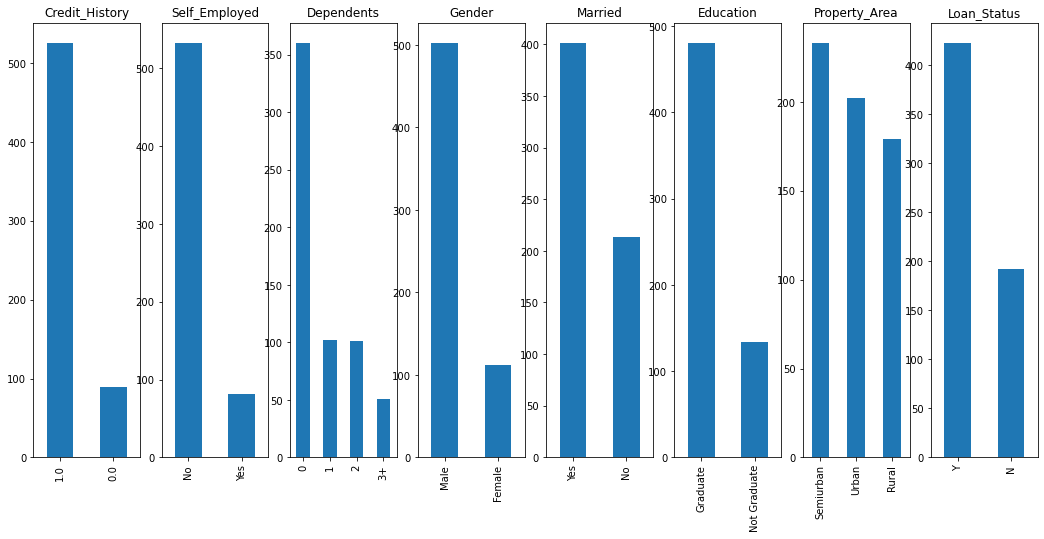

In [32]:
#Let's now plot the categorical features:

cols=['Credit_History','Self_Employed','Dependents', 'Gender', 'Married', 'Education', 'Property_Area', 'Loan_Status' ]

fig, ax = plt.subplots(1, len(cols),figsize = (18, 8))
for i, col in enumerate(df[cols]):
    df[col].value_counts().plot(kind="bar", ax=ax[i]).set_title(col)
fig.show()

# Observations
As we see, almost all categorical features are imbalanced.

- In case of Credit History, our dataset has more cases of loans that has credit history.
- In case of Self Employed, we also se huge ibalance in our data. We have way less cases of Self Employed.
- For Dependent feature, we have 4 categories from which the highest number of cases is for 0 Dependents.
- In case of Gender of the applicant, we have way more cases of males than females.
- And then we have the Married status of the applicant, where we see a noticable imbalance in our feature and has more cases of married applicants than non married.
- If we check he Graduation feature of the applicant, we can see the high number of graduated applicants applies for loan more than non graduates, with a huge difference between both groups with respect the proportions of each type of applicant.
- With regards Property Area, almost the categories of this feature is balanced.
- Lastly, we have target data Loan Status which, as we said previouly, has imbalance data as we double cases of Loan Aount approved than Not approved.

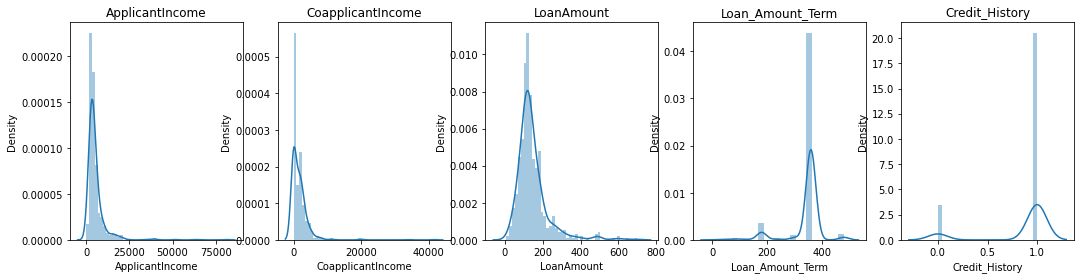

In [33]:
#Now plotting the non categorical features which are almost all numerical features:

cols_num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

fig, ax = plt.subplots(1, len(cols_num),figsize = (18, 4))
for i, col in enumerate(df[cols_num]):
    sns.distplot(df[col], ax=ax[i]).set_title(col)
fig.show()

# Observations
So here we can highlight the following:

- In feature Applicant Income, we see the we have high density of cases of income between 0 and aroound 15k.

- In feature CoapplicantIncome, we can see and notice the density of frecuency is higher around 0. the incomes are between 0 and 4k.

- If we check Loan Amount, we can say that almost all the cases are between 0 and 300.

- And for Loan Amount Term, we have high probability to have a 360 terms of loan amount than 160 of terms of loan amount if we only take in account the highest 2 unique values.

- Finally, the credit history, as we said previously, we have almost 90% of cases having Credit History.

# Bivariate analysis

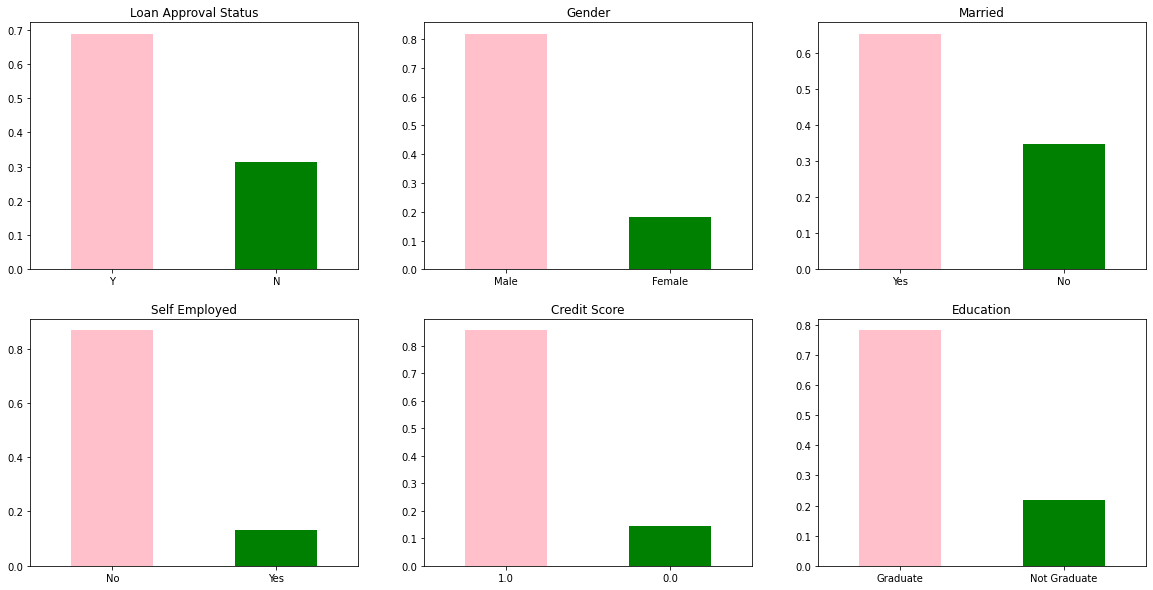

In [34]:
#Visualizing Categorical Features.

plt.figure(1)

Color = ["pink", "green"]

plt.subplot(231)
df['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Loan Approval Status', color = Color)
plt.xticks(rotation = 0)
#print(Train['Loan_Status'].value_counts())

#plt.style.use('ggplot')
#df['Loan_Status'].value_counts().plot.bar(title='Loan Status',rot=0)
#display(df['Loan_Status'].value_counts())

plt.subplot(232)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color = Color)
plt.xticks(rotation = 0)

plt.subplot(233)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married', color = Color)
plt.xticks(rotation = 0)

plt.subplot(234)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed', color = Color)
plt.xticks(rotation = 0)

plt.subplot(235)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit Score', color = Color)
plt.xticks(rotation = 0)

plt.subplot(236)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education', color = Color)
plt.xticks(rotation = 0)

plt.show()

# Observations

- We have 70% of the applicants get Loan approved. Good!

- 80% of the applicants are male and 20% are Females.

- We have 65% Married applicants and 35% unmarried applicants.

- Regarding Self Employment, we only have 15% of applicants that are self employed.

- Then, regading the credit history, we have that more than 85% of the applicants have a credit history.

- And finally, almost 80% of the applicants are graduated.

Loan Status    N    Y
Gender               
Female        37   75
Male         155  347
Loan Status    N    Y
Married              
No            79  134
Yes          113  288
Loan Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33
Loan Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82
Loan Status      N    Y
Self_Employed          
No             166  366
Yes             26   56
Loan Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
Loan Status    N    Y
Loan_Status          
N            192    0
Y              0  422


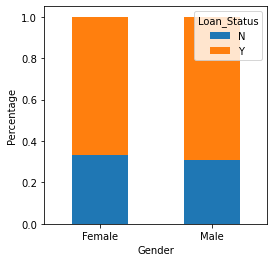

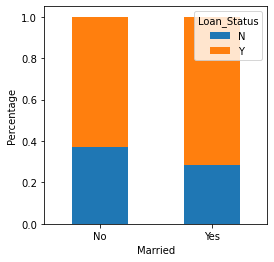

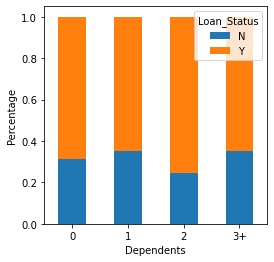

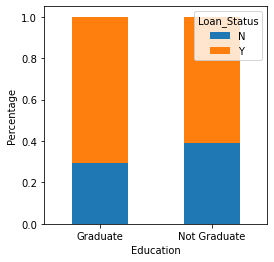

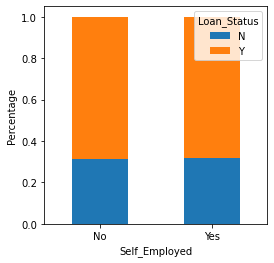

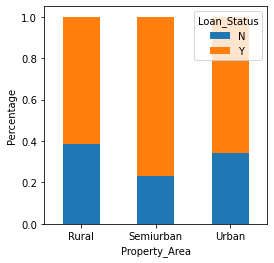

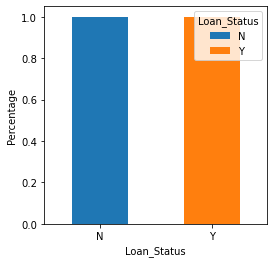

In [35]:
#Bivariate Analysis
#Categorical Independent Variable vs Target Variable

for col in df.columns:
     if df[col].dtype == object:
            print(pd.crosstab(df[col], df["Loan_Status"], colnames=['Loan Status'], dropna = True))

#Stacked Bar Plot: Proportion of Loan Approved or not Approved based on Gender:
            col_name = pd.crosstab(df[col], df['Loan_Status'])
            col_name.div(col_name.sum(axis = 1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
            plt.xlabel(col)
            plt.ylabel('Percentage')
            plt.xticks(rotation = 0);

# Observations
Let's summarize the main points of the above plots:

- Regarding the Gender, we see both Male and Femals get their loan approved in the same or similar probability.
- Similar case happens with Married Feature, both Married and unmarried have the similar probility of happening of a loan approved or not.
- From Dependent side, we can notice that group 3 has mor probaility to happen than other groups.
- With regards the education, Graduated applicants have more probaility to have the loan application approved.
- In case of self employed feature, we can say both self employed or not can have the loan approved in the same or similar proportion.
- Regards, Area of Property, we can say Semiurban has highest probaility to have the loan application approved. The second is Urban.

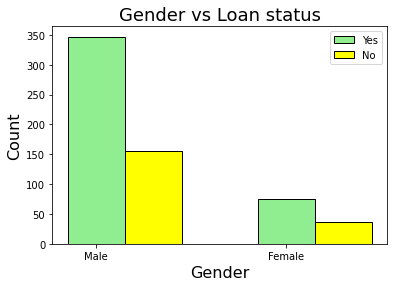

In [36]:
#Relationship between Gender and Loan Status:

Gender = ['Male', 'Female']
Loan_Status = ['Yes', 'No']
pos= np.arange(len(Gender))
bar_width= 0.30
Loan_Status_Yes= [347,75]
Loan_Status_NO= [155,37]

plt.bar(pos,Loan_Status_Yes,bar_width,color='lightgreen',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='yellow',edgecolor='black')
plt.xticks(pos, Gender)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Gender vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

# Observations
From the chart above, we can conclude that male applicants have higher percentage of loan approval than female applicants and we move more male than female applying for loan

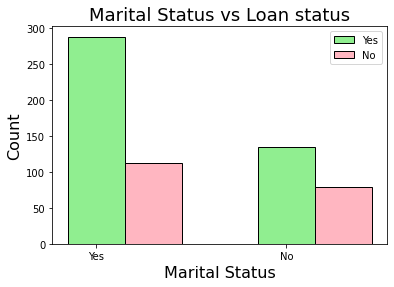

In [37]:
#Relationship between marital status vs loan status

MaritalStatus=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(MaritalStatus))
bar_width=0.30
Loan_Status_Yes=[288,134]
Loan_Status_NO=[113,79]

plt.bar(pos,Loan_Status_Yes,bar_width,color='lightgreen',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='lightpink',edgecolor='black')
plt.xticks(pos, MaritalStatus)
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Marital Status vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

# Observations
From the chart above, we can conclude that the we have more married than others approved for loan. We can see that probability of getting a loan for married people was high by around 9%.

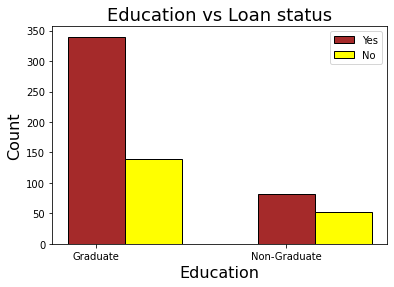

In [38]:
#Relationship between education vs Loan status:

Education=['Graduate', 'Non-Graduate']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Education))
bar_width=0.30
Loan_Status_Yes=[340,82]
Loan_Status_NO=[140,52]

plt.bar(pos,Loan_Status_Yes,bar_width,color='brown',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='yellow',edgecolor='black')
plt.xticks(pos, Education)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Education vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

# Observations
From the chart above, we can conclude that the applicants who are graduates were in higher percentage of loan approval than non-graduate applicants.

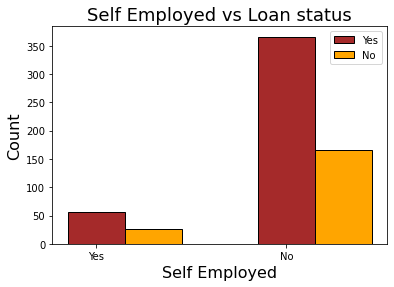

In [39]:
#Relationship between Self-Employed vs Loan_Status:

Self_Employed=['Yes', 'No']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Self_Employed))
bar_width=0.30
Loan_Status_Yes=[56,366]
Loan_Status_NO=[26,166]

plt.bar(pos,Loan_Status_Yes,bar_width,color='brown',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='orange',edgecolor='black')
plt.xticks(pos, Self_Employed)
plt.xlabel('Self Employed', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Self Employed vs Loan status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

# Observations
From the chart above, we can conclude that the applicants who are not self employed were in higher percentage of loan approval than self employed applicants.

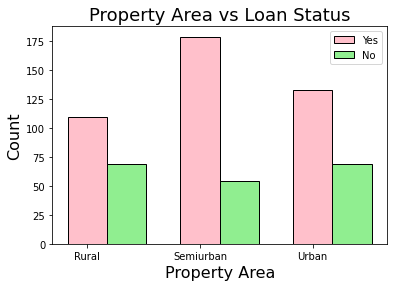

In [40]:
#Relationship between Property area and loan status

Property_Area=['Rural','Semiurban','Urban']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Property_Area))
bar_width=0.35
Loan_Status_Yes=[110,179,133]
Loan_Status_NO=[69,54,69]

plt.bar(pos,Loan_Status_Yes,bar_width,color='pink',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='lightgreen',edgecolor='black')
plt.xticks(pos, Property_Area)
plt.xlabel('Property Area', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Property Area vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=1)
plt.show()

# Observations
From the chart above we can infer that, the higher percentage of loan approval is for semi-urban houses followed by urban and rural houses.

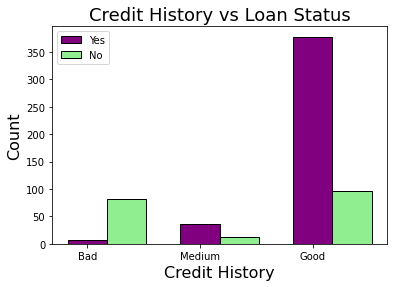

In [41]:
#Relationship between Credit History and Loan Status: 

Credit_History=['Bad','Medium','Good']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Credit_History))
bar_width=0.35
Loan_Status_Yes=[7,37,378]
Loan_Status_NO=[82,13,97]

plt.bar(pos,Loan_Status_Yes,bar_width,color='purple',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='lightgreen',edgecolor='black')
plt.xticks(pos, Credit_History)
plt.xlabel('Credit History', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Credit History vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=2)
plt.show()

# Observations
From the chart above results we can infer that, the higher percentage of loan approval is for customers with good credit history followed bycustomers with medium credit history and then the bad

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

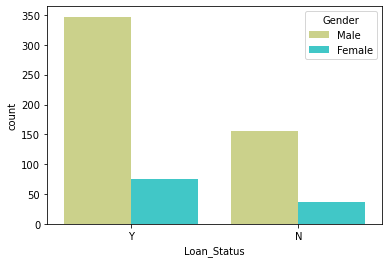

In [42]:
sns.countplot(x='Loan_Status', hue='Gender',data=df,palette='rainbow_r')

# Observations
There are more male applicants and those who were granted loan compared to the females
Those who were rejected loan are less in number

# Multivariate Analysis:

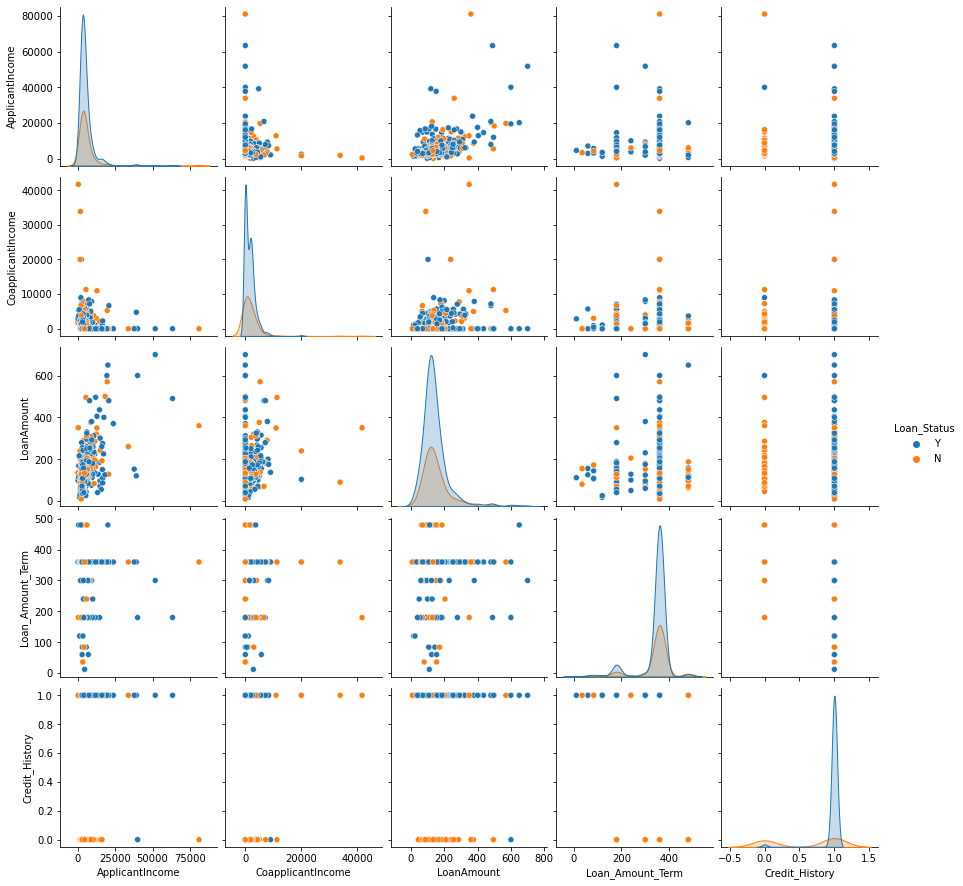

In [43]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Loan_Status")

# Observations
This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Loan_Status".

Here we can observe the relation between the features and label.

We can observe the linear relationship between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and TotalIncome.

We can also observe the correlation in some columns also there are outliers present in some of the columns.

# Identifying the outliers:

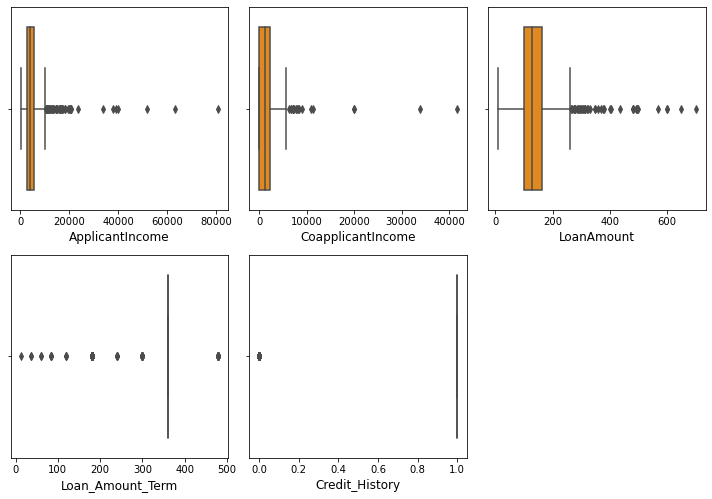

In [44]:
# Identifying the outliers present in numerical columns using boxplo

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

# Observations
We can observe the outliers present in all the columns. But the columns Credit history has only two unique values so no need to remove outliers in this column. Let's remove outliers in remaining columns them using Zscore method.

# Removing outliers:

# 1.Zscore method:

In [45]:
# numerical columns containing outliers
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

# Using Zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Now we have removed the outliers, let's check the dataloss.

In [46]:
#Checking shape of new dataset
df_new.shape

(577, 12)

The new dataset has 577 rows and 12 columns.

In [47]:
#Checking shape of old dataset
df.shape

(614, 12)

The dataset previously had 614 rows and 12 columns.

In [48]:
#Checking dataloss in zscore method
Dataloss = (((614-577)/614)*100)
Dataloss

6.026058631921824

Using Zscore we have 6.02% data loss.Which is less than 10%.But still we will have a look into IQR method also.

# ii) IQR method:

In [49]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

We have removed the skewness using IQR method.

In [50]:
#Checking shape of new dataset
df_1.shape

(459, 12)

The new dataset has 459 rows and 12 columns.

In [51]:
#Checking shape of old dataset
df.shape

(614, 12)

The dataset previously had 614 rows and 12 columns.

In [52]:
#Checking dataloss in IQR
Dataloss = (((614-459)/614)*100)
Dataloss

25.2442996742671

There is a huge dataloss in IQR method so let us stick to zscore method to remove outliers.

# Checking for skewness: 

In [53]:
#Checking for skewness
df_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

No need to remove skewness in Credit_History and Loan_Amount_Term since they can be considered as categorical columns though having integer data.

# Removing skewness using yeo-johnson method:

In [54]:
#Creating a list of skewed features
fea=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

Taking a list as fea with all the columns with skewness.

In [55]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Removing the skewness using yeo_johnson method.

In [56]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

The skewness has been removed.

In [57]:
#Checking skewness again
df_new[fea].skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
dtype: float64

This confirms the skewness is removed.

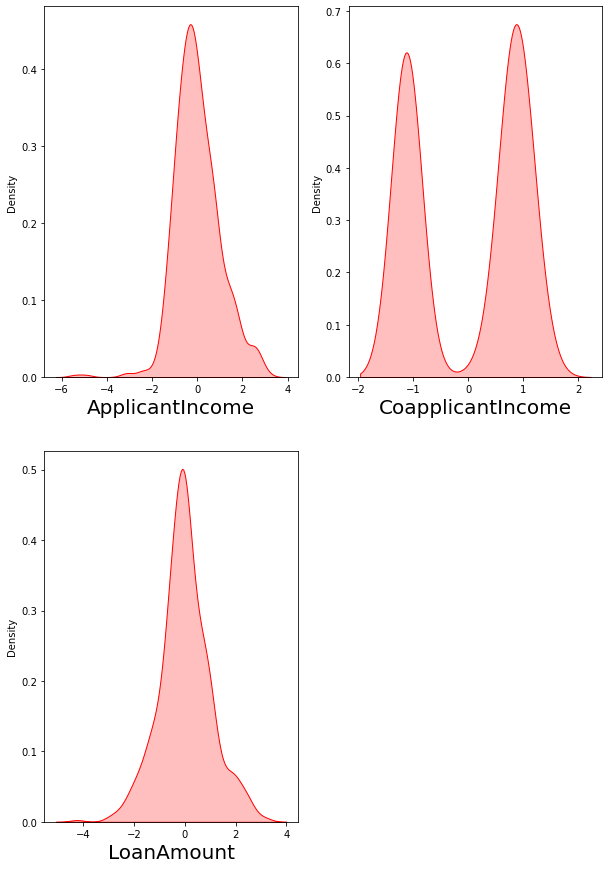

In [58]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in df_new[fea]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df_new[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

This shows that the skewness is removed completely.

# Label Encoding:

In [59]:
# Separating categorical columns in df_new
cat_col=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Above is the list of categorical columns in new dataset.

In [60]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[cat_col]= df_new[cat_col].apply(LE.fit_transform)

In [61]:
df_new[cat_col].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


Using label encoder we have converted the categorical columns into numerical.

# Checking correlation using heat map:

In [62]:
# Assigning a variable for correlation.
cor=df_new.corr()

In [63]:
# Checking correlation
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


Above is the correlations of all the pair of features.To get better visualization on the correlation of features,we will plot it using heat map.

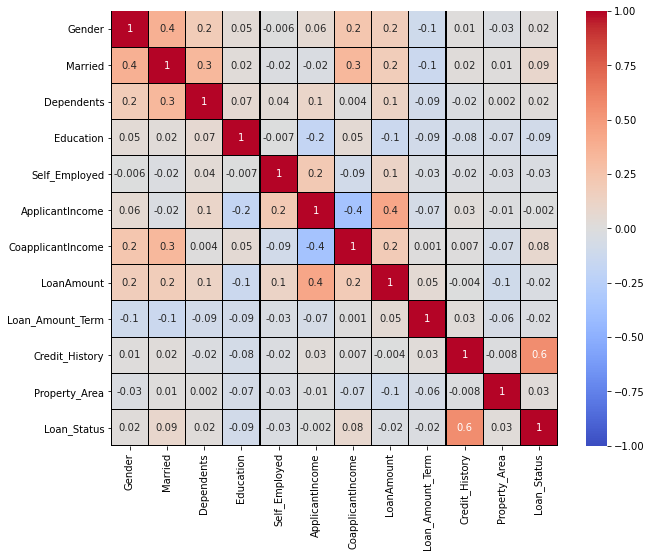

In [64]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

# Observations

- There is no multicolinearity issue in this dataset.
- We can notice that with target column ApplicantIncome and CoapplicantIncome is very less correlated.

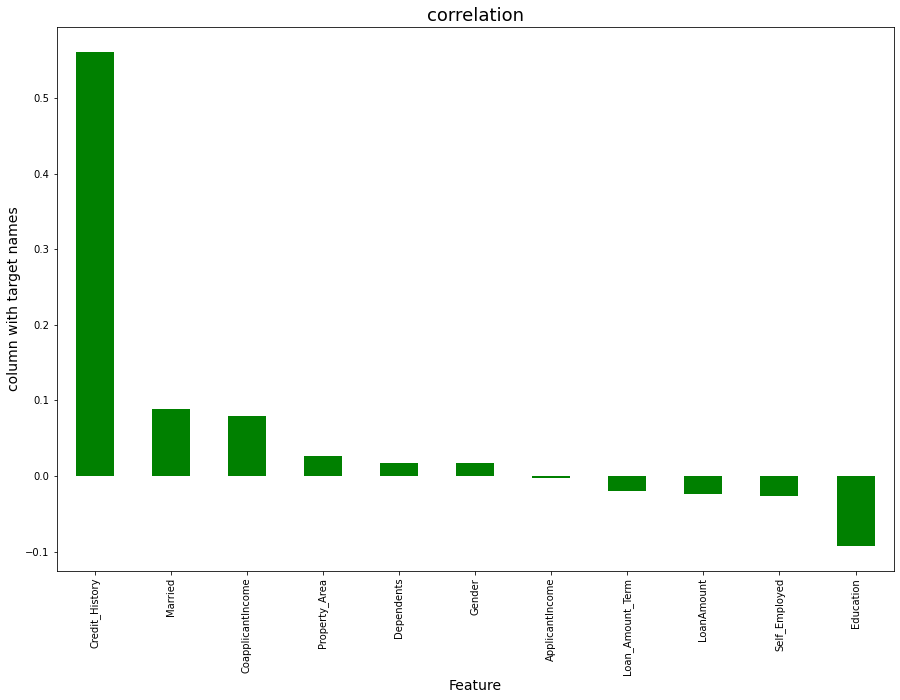

In [65]:
# Plotting bar plot of target correlation to get better vission.
plt.figure(figsize=(15,10))
df_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Observations
- The target column has a good positive correlation with 'Credit history'
- The columns coapplicant income Marital status property area Dependents and gender have positive correlation with the target/label
- The column Applicants income have zero to negligible correlation. Hence they can be dropped from the dataset later
- The columns Loan amount term, loan amount, self employed and education are negatively correlated to the target 

In [66]:
#Droping less correlated column
df_new = df_new.drop(["ApplicantIncome"],axis=1)

# Separating features and label

In [67]:
# Separating the target and independent columns.
x = df_new.drop("Loan_Status",axis=1)
y = df_new["Loan_Status"]

# Scaling the data using standard scaler

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

We have scaled the data using standard scaler.

In [69]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,-1.122446,0.238260,0.230853,0.418513,1.227472


This is the data of independent variables after scaling.

# Balancing the target variable using oversampling:

In [70]:
#Checking the value count of target column
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [71]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [72]:
# Checking the value counts again
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

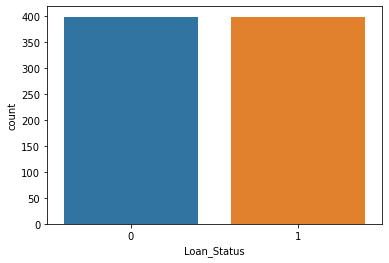

In [73]:
# Visualizing the data after oversampling
sns.countplot(y)

Now the data is balanced.

# Finding Best Random State and Accuracy:

In [74]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8786610878661087  on Random_state  86


The above is the best accuracy and random state.

In [76]:
# Creating train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Classification Algorithms:

In [77]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# i) DecisionTreeClassifier:

In [78]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, preddt))
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

Accuracy Score: 0.7615062761506276
Confusion Matrix: [[ 82  21]
 [ 36 100]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       103
           1       0.83      0.74      0.78       136

    accuracy                           0.76       239
   macro avg       0.76      0.77      0.76       239
weighted avg       0.77      0.76      0.76       239



DTC is giving me 76.16% accuracy.

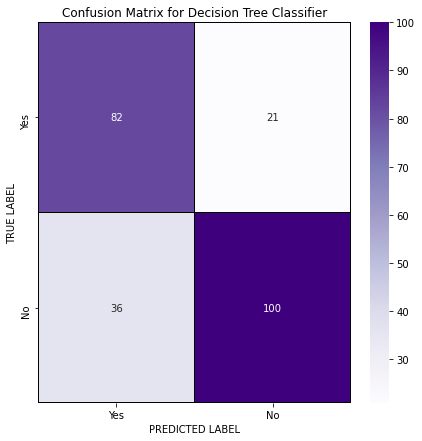

In [79]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

We can see the true values and predicted values in Decision Tree Classifier model using confusion matrix.

# ii) RandomForestClassifier:

In [80]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8661087866108786
Confusion Matrix: [[ 85  18]
 [ 14 122]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       103
           1       0.87      0.90      0.88       136

    accuracy                           0.87       239
   macro avg       0.87      0.86      0.86       239
weighted avg       0.87      0.87      0.87       239



RFC is giving me 86.61% accuracy.

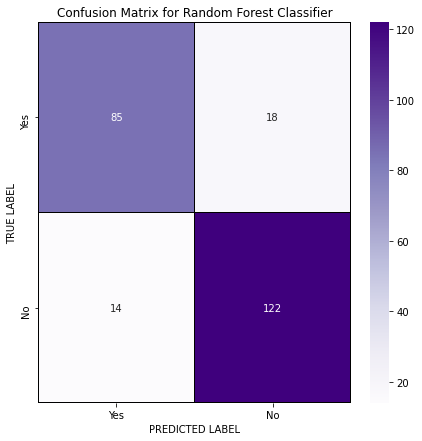

In [81]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

We can see the true values and predicted values in Random Forest Classifier model using confusion matrix.

# iii) SupportVectorClassifier:

In [82]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.7740585774058577
Confusion Matrix: [[ 62  41]
 [ 13 123]]
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       103
           1       0.75      0.90      0.82       136

    accuracy                           0.77       239
   macro avg       0.79      0.75      0.76       239
weighted avg       0.78      0.77      0.77       239



SVC is giving approximately 77.40% accuracy.

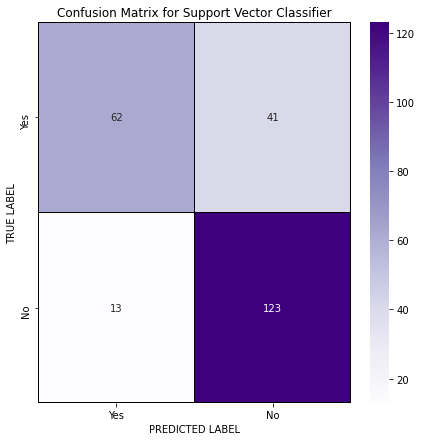

In [83]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

We can see the true values and predicted values in Support Vector Classifier model using confusion matrix.

# iv) K-Neighbor Classifier:

In [84]:
knn=KNN()
knn.fit(X_train,y_train)
predkn=knn.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predkn))
print('Confusion Matrix:',confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

Accuracy Score: 0.7573221757322176
Confusion Matrix: [[ 75  28]
 [ 30 106]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       103
           1       0.79      0.78      0.79       136

    accuracy                           0.76       239
   macro avg       0.75      0.75      0.75       239
weighted avg       0.76      0.76      0.76       239



KNN is giving 75.73% accuracy.

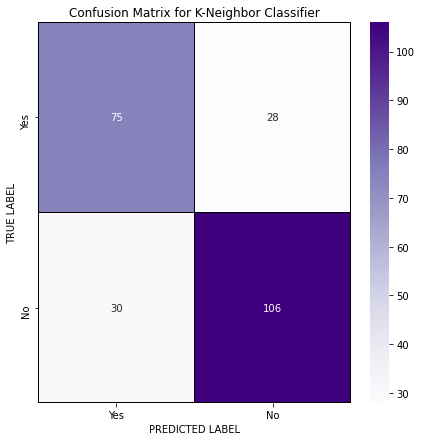

In [85]:
cm = confusion_matrix(y_test, predkn)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbor Classifier')
plt.show()

We can see the true values and predicted values in KNN Classifier model using confusion matrix.

# v) Gradient Boosting Classifier:

In [86]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8577405857740585
Confusion Matrix: [[ 78  25]
 [  9 127]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       103
           1       0.84      0.93      0.88       136

    accuracy                           0.86       239
   macro avg       0.87      0.85      0.85       239
weighted avg       0.86      0.86      0.86       239



GBC is giving 85.77% accuracy.

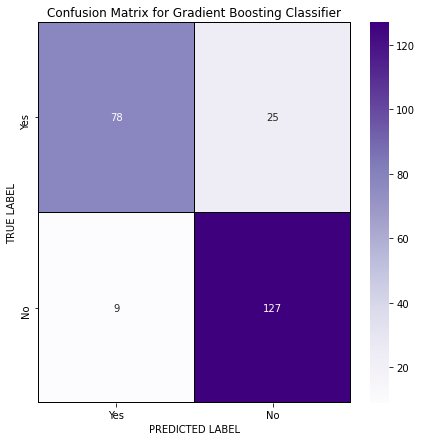

In [87]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

We can see the true values and predicted values in Gradient Boosting Classifier model using confusion matrix.

# vi) XGBClassifier:

In [88]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
predxg=XGB.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predxg))
print('Confusion Matrix:',confusion_matrix(y_test, predxg))
print(classification_report(y_test,predxg))

[18:13:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.8326359832635983
Confusion Matrix: [[ 89  14]
 [ 26 110]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       103
           1       0.89      0.81      0.85       136

    accuracy                           0.83       239
   macro avg       0.83      0.84      0.83       239
weighted avg       0.84      0.83      0.83       239



XGB is giving 83.26% accuracy.

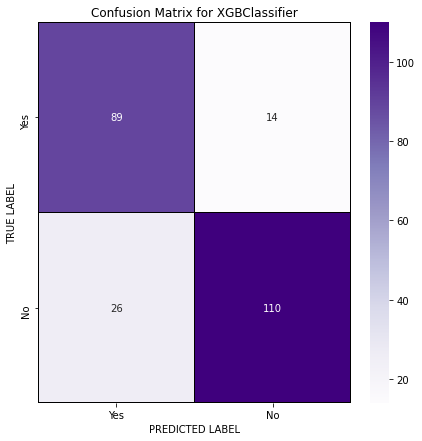

In [89]:
cm = confusion_matrix(y_test, predxg)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

We can see the true values and predicted values in XGB Classifier model using confusion matrix.

# Cross Validation Scores

In [90]:
#Importing library
from sklearn.model_selection import cross_val_score

In [91]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,X,y,cv=5).mean())

0.778938679245283


In [92]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8204559748427673


In [93]:
# cv score for Support Vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

0.7299449685534591


In [94]:
# cv score for KNN Classifier
print(cross_val_score(knn,X,y,cv=5).mean())

0.7487971698113208


In [95]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X,y,cv=5).mean())

0.7953459119496855


In [96]:
# cv score for XGB Classifier
print(cross_val_score(XGB,X,y,cv=5).mean())

[18:13:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

Above are the cross validation scores of DTC,RFC,SVC,KNN,GBC and XGB.

By looking into the difference of model accuracy and cross validation score we can conclude that RFC has least difference. Hence RFC is the best model.

# Hyper Parameter tuning

In [97]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [99]:
# Defining the parameters list for RFC model.
parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [100]:
# Running grid search CV for RFC
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [104]:
# Training the model with GCV
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [106]:
# Getting the best parameters for RFC
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [107]:
#Checking the accuracy of final model
Final_model=RandomForestClassifier(criterion='gini',max_depth=15, max_features='sqrt', n_estimators=100)
Final_model.fit(X_train,y_train)
pred=Final_model.predict(X_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

87.86610878661088


After tuning we have the accuracy as 87.86% , which is good.

# ROC-AUC curve

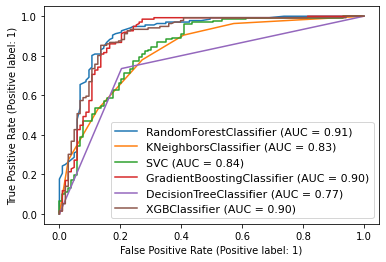

In [108]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(RFC,X_test,y_test)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(SV, X_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Above is the ROC curves for all the models that we have predicted. And the AUC values can also be seen in the plot. Which clearly shows RFC has better performance than other models.

RFC has AUC of 91% which is great 

# Saving the model:

In [110]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_model,"Loan_Prediction.pkl")

['Loan_Prediction.pkl']

We have saved the model as Loan_Prediction.

# Predictions:

In [111]:
# Loading the saved model
model=joblib.load("Loan_Prediction.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [112]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,1,1,0,0,1,0,1,0,1,0,...,0,0,1,1,0,0,1,0,1,0
Actual,1,1,0,0,1,0,1,0,1,0,...,0,0,1,1,0,0,1,0,1,0


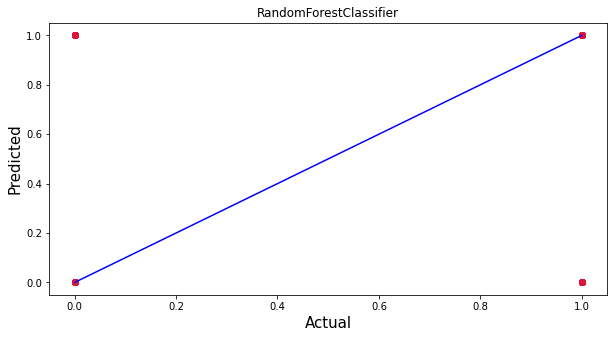

In [113]:
# Plotting Actual vs Predicted.
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("RandomForestClassifier")
plt.show()

Above are the predicted values and the actual values which look similar.